In [6]:
!unzip /content/training_set.zip -d training_set

Archive:  /content/training_set.zip
   creating: training_set/training_set/
 extracting: training_set/training_set/000_HC.png  
  inflating: training_set/training_set/000_HC_Annotation.png  
 extracting: training_set/training_set/001_HC.png  
  inflating: training_set/training_set/001_HC_Annotation.png  
 extracting: training_set/training_set/002_HC.png  
  inflating: training_set/training_set/002_HC_Annotation.png  
 extracting: training_set/training_set/003_HC.png  
  inflating: training_set/training_set/003_HC_Annotation.png  
 extracting: training_set/training_set/004_HC.png  
  inflating: training_set/training_set/004_HC_Annotation.png  
 extracting: training_set/training_set/005_HC.png  
  inflating: training_set/training_set/005_HC_Annotation.png  
 extracting: training_set/training_set/006_HC.png  
  inflating: training_set/training_set/006_HC_Annotation.png  
 extracting: training_set/training_set/007_HC.png  
  inflating: training_set/training_set/007_HC_Annotation.png  
 ext

In [4]:
!unzip /content/test_set.zip -d test_set

Archive:  /content/test_set.zip
   creating: test_set/test_set/
  inflating: test_set/test_set/000_HC.png  
 extracting: test_set/test_set/001_HC.png  
 extracting: test_set/test_set/002_HC.png  
 extracting: test_set/test_set/003_HC.png  
 extracting: test_set/test_set/004_HC.png  
 extracting: test_set/test_set/005_HC.png  
 extracting: test_set/test_set/006_HC.png  
 extracting: test_set/test_set/007_HC.png  
 extracting: test_set/test_set/008_HC.png  
  inflating: test_set/test_set/009_HC.png  
 extracting: test_set/test_set/010_HC.png  
 extracting: test_set/test_set/011_HC.png  
  inflating: test_set/test_set/012_HC.png  
 extracting: test_set/test_set/013_HC.png  
 extracting: test_set/test_set/014_HC.png  
  inflating: test_set/test_set/015_HC.png  
 extracting: test_set/test_set/016_HC.png  
 extracting: test_set/test_set/017_HC.png  
 extracting: test_set/test_set/018_HC.png  
 extracting: test_set/test_set/019_HC.png  
 extracting: test_set/test_set/020_HC.png  
 extracting:

In [5]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:
import pandas as pd
import cv2
import os
import numpy as np

TEST_CSV = "/content/test_set_pixel_size.csv"
TEST_IMG_DIR = "/content/test_set/test_set"

df_test = pd.read_csv(TEST_CSV)

print("Number of test samples:", len(df_test))

pixel_size_test = df_test['pixel size(mm)'].values
print("\nPixel size statistics (mm/pixel) - Test set:")
print(f"Min  : {pixel_size_test.min():.4f}")
print(f"Max  : {pixel_size_test.max():.4f}")
print(f"Mean : {pixel_size_test.mean():.4f}")

# Image resolution statistics (sample)
heights, widths = [], []
for fname in df_test['filename'].astype(str).values[:100]:
    img = cv2.imread(os.path.join(TEST_IMG_DIR, fname), cv2.IMREAD_GRAYSCALE)
    if img is not None:
        h, w = img.shape
        heights.append(h)
        widths.append(w)

print("\nImage resolution (sampled):")
print(f"Height: min={min(heights)}, max={max(heights)}, mean={np.mean(heights):.1f}")
print(f"Width : min={min(widths)}, max={max(widths)}, mean={np.mean(widths):.1f}")

Number of test samples: 335

Pixel size statistics (mm/pixel) - Test set:
Min  : 0.0526
Max  : 0.3713
Mean : 0.1415

Image resolution (sampled):
Height: min=540, max=544, mean=540.0
Width : min=799, max=800, mean=800.0


In [7]:
LABEL_PATH = "/content/training_set_pixel_size_and_HC.csv"
IMG_DIR = "/content/training_set/training_set"

df = pd.read_csv(LABEL_PATH)

print("Number of samples:", len(df))
df.head()

Number of samples: 999


,filename,pixel size(mm),head circumference (mm)
0,000_HC.png,0.069136,44.30
1,001_HC.png,0.089659,56.81
2,002_HC.png,0.062033,68.75
3,003_HC.png,0.091291,69.00
4,004_HC.png,0.061240,59.81


In [8]:
print("Columns:", df.columns.tolist())

Columns: ['filename', 'pixel size(mm)', 'head circumference (mm)']


In [9]:
image_files = sorted(os.listdir(IMG_DIR))
print("Number of images:", len(image_files))

missing = set(df.iloc[:, 0].astype(str)) - set(image_files)
print("Missing images:", len(missing))

Number of images: 1998
Missing images: 0


In [10]:
heights = []
widths = []

for img_name in image_files[:100]:
    img_path = os.path.join(IMG_DIR, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    h, w = img.shape
    heights.append(h)
    widths.append(w)

print(f"Image height: min={min(heights)}, max={max(heights)}, mean={np.mean(heights):.1f}")
print(f"Image width : min={min(widths)}, max={max(widths)}, mean={np.mean(widths):.1f}")

Image height: min=540, max=540, mean=540.0
Image width : min=800, max=800, mean=800.0


In [11]:
hc = df['head circumference (mm)'].values
pixel_size = df['pixel size(mm)'].values
filenames = df['filename'].astype(str).values

print("Number of samples:", len(df))

print("\nHead Circumference statistics (mm):")
print(f"Min  : {hc.min():.2f}")
print(f"Max  : {hc.max():.2f}")
print(f"Mean : {hc.mean():.2f}")
print(f"Std  : {hc.std():.2f}")

print("\nPixel size statistics (mm/pixel):")
print(f"Min  : {pixel_size.min():.4f}")
print(f"Max  : {pixel_size.max():.4f}")
print(f"Mean : {pixel_size.mean():.4f}")

Number of samples: 999

Head Circumference statistics (mm):
Min  : 44.30
Max  : 346.40
Mean : 174.38
Std  : 65.25

Pixel size statistics (mm/pixel):
Min  : 0.0494
Max  : 0.3933
Mean : 0.1398


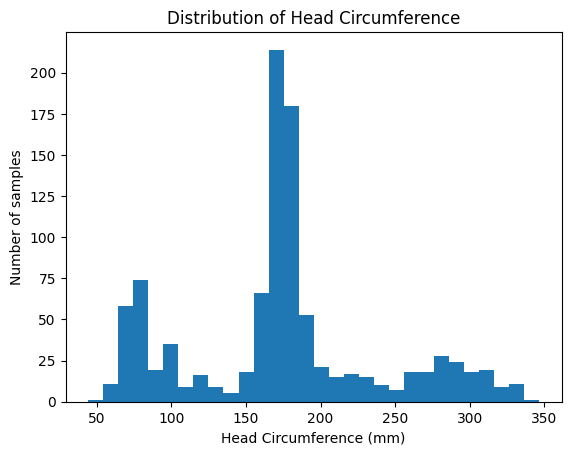

In [12]:
plt.hist(hc, bins=30)
plt.xlabel("Head Circumference (mm)")
plt.ylabel("Number of samples")
plt.title("Distribution of Head Circumference")
plt.show()

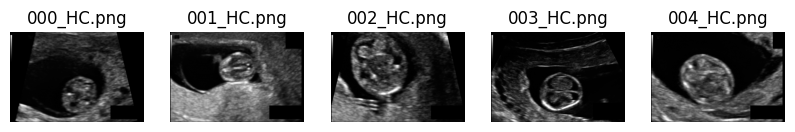

In [13]:
plt.figure(figsize=(10,4))
for i, fname in enumerate(filenames[:5]):
    img = cv2.imread(os.path.join(IMG_DIR, fname), cv2.IMREAD_GRAYSCALE)
    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title(fname)

plt.show()

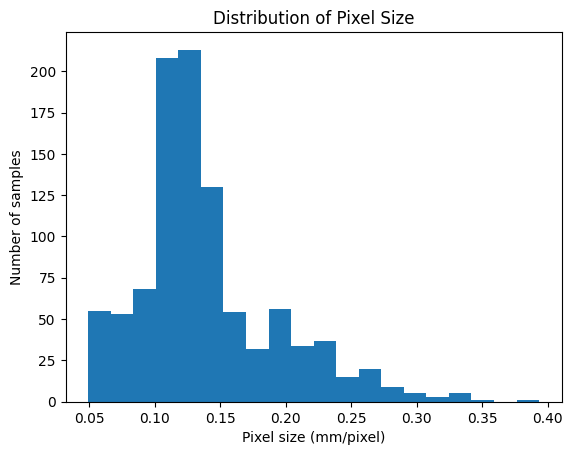

In [14]:
plt.hist(pixel_size, bins=20)
plt.xlabel("Pixel size (mm/pixel)")
plt.ylabel("Number of samples")
plt.title("Distribution of Pixel Size")
plt.show()

In [15]:
import os
import cv2
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms

from sklearn.model_selection import train_test_split

In [16]:
class HC18Dataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.df = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        img_path = os.path.join(self.img_dir, row['filename'])
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            raise ValueError(f"Cannot read image {img_path}")

        image = image / 255.0
        image = np.expand_dims(image, axis=0)  # (1, H, W)

        hc = row['head circumference (mm)']
        hc = torch.tensor(hc, dtype=torch.float32)

        image = torch.tensor(image, dtype=torch.float32)

        return image, hc


In [17]:
CSV_PATH = "/content/training_set_pixel_size_and_HC.csv"
IMG_DIR = "/content/training_set/training_set"

train_df, val_df = train_test_split(
    pd.read_csv(CSV_PATH),
    test_size=0.2,
    random_state=42
)

train_df.to_csv("/content/train.csv", index=False)
val_df.to_csv("/content/val.csv", index=False)


In [31]:
train_dataset = HC18Dataset("/content/train.csv", IMG_DIR)
val_dataset   = HC18Dataset("/content/val.csv", IMG_DIR)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [30]:
class HC18Dataset(Dataset):
    def __init__(self, csv_file, img_dir, img_size=224):
        self.df = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.img_size = img_size

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        img_path = os.path.join(self.img_dir, row['filename'])
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            raise ValueError(f"Cannot read image {img_path}")

        image = cv2.resize(image, (self.img_size, self.img_size))

        image = image / 255.0
        image = np.expand_dims(image, axis=0)

        hc = row['head circumference (mm)']

        return torch.tensor(image, dtype=torch.float32), \
               torch.tensor(hc, dtype=torch.float32)


In [32]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = ResNet18Regression().to(device)

criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [33]:
def train_one_epoch(model, loader):
    model.train()
    total_loss = 0

    for images, hc in loader:
        images = images.to(device)
        hc = hc.to(device)

        preds = model(images)
        loss = criterion(preds, hc)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * images.size(0)

    return total_loss / len(loader.dataset)


def validate(model, loader):
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for images, hc in loader:
            images = images.to(device)
            hc = hc.to(device)

            preds = model(images)
            loss = criterion(preds, hc)
            total_loss += loss.item() * images.size(0)

    return total_loss / len(loader.dataset)

In [27]:
EPOCHS = 10

for epoch in range(EPOCHS):
    train_mae = train_one_epoch(model, train_loader)
    val_mae = validate(model, val_loader)

    print(f"Epoch {epoch+1}/{EPOCHS} | Train MAE: {train_mae:.3f} | Val MAE: {val_mae:.3f}")

Epoch 1/10 | Train MAE: 170.506 | Val MAE: 172.462


KeyboardInterrupt: 

In [28]:
experiments = [
    {"lr": 1e-3, "batch_size": 16, "epochs": 20},
    {"lr": 1e-4, "batch_size": 16, "epochs": 30},
    {"lr": 1e-4, "batch_size": 8,  "epochs": 30},
]

In [34]:
results = []

for exp_id, exp in enumerate(experiments):
    print(f"\n===== Experiment {exp_id+1} =====")
    print(exp)

    model = ResNet18Regression().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=exp["lr"])
    criterion = nn.L1Loss()

    train_loader = DataLoader(
        train_dataset,
        batch_size=exp["batch_size"],
        shuffle=True
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=exp["batch_size"],
        shuffle=False
    )

    best_val = float("inf")

    for epoch in range(exp["epochs"]):
        train_mae = train_one_epoch(model, train_loader)
        val_mae = validate(model, val_loader)

        if val_mae < best_val:
            best_val = val_mae

        print(
            f"Epoch {epoch+1}/{exp['epochs']} | "
            f"Train MAE: {train_mae:.3f} | Val MAE: {val_mae:.3f}"
        )

    results.append({
        "LR": exp["lr"],
        "Batch size": exp["batch_size"],
        "Epochs": exp["epochs"],
        "Best Val MAE": best_val
    })


===== Experiment 1 =====
{'lr': 0.001, 'batch_size': 16, 'epochs': 20}
Epoch 1/20 | Train MAE: 156.714 | Val MAE: 140.302
Epoch 2/20 | Train MAE: 115.331 | Val MAE: 64.970
Epoch 3/20 | Train MAE: 68.873 | Val MAE: 64.268
Epoch 4/20 | Train MAE: 32.779 | Val MAE: 30.121
Epoch 5/20 | Train MAE: 26.473 | Val MAE: 26.192
Epoch 6/20 | Train MAE: 21.639 | Val MAE: 18.830
Epoch 7/20 | Train MAE: 20.632 | Val MAE: 40.555
Epoch 8/20 | Train MAE: 18.338 | Val MAE: 22.638
Epoch 9/20 | Train MAE: 18.507 | Val MAE: 15.547
Epoch 10/20 | Train MAE: 16.158 | Val MAE: 17.754
Epoch 11/20 | Train MAE: 17.145 | Val MAE: 14.240
Epoch 12/20 | Train MAE: 13.567 | Val MAE: 15.893
Epoch 13/20 | Train MAE: 15.380 | Val MAE: 14.428
Epoch 14/20 | Train MAE: 15.119 | Val MAE: 14.249
Epoch 15/20 | Train MAE: 13.484 | Val MAE: 19.699
Epoch 16/20 | Train MAE: 13.398 | Val MAE: 17.170
Epoch 17/20 | Train MAE: 15.283 | Val MAE: 16.391
Epoch 18/20 | Train MAE: 13.545 | Val MAE: 18.378
Epoch 19/20 | Train MAE: 14.315 | 

In [35]:
results_df = pd.DataFrame(results)
results_df

,LR,Batch size,Epochs,Best Val MAE
0,0.0010,16,20,14.240353
1,0.0001,16,30,34.042081
2,0.0001,8,30,14.842188


In [36]:
class HC18TestDataset(Dataset):
    def __init__(self, csv_file, img_dir, img_size=224):
        self.df = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.img_size = img_size

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        img_path = os.path.join(self.img_dir, row['filename'])
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            raise ValueError(f"Cannot read image {img_path}")

        image = cv2.resize(image, (self.img_size, self.img_size))
        image = image / 255.0
        image = np.expand_dims(image, axis=0)

        image = torch.tensor(image, dtype=torch.float32)

        return image, row['filename']


In [41]:
TEST_CSV = "/content/test_set_pixel_size.csv"
TEST_IMG_DIR = "/content/test_set/test_set"

test_dataset = HC18TestDataset(TEST_CSV, TEST_IMG_DIR)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [38]:
torch.save(model.state_dict(), "/content/best_model.pth")

In [39]:
model = ResNet18Regression().to(device)
model.load_state_dict(torch.load("/content/best_model.pth", map_location=device))
model.eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet18Regression(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, 

In [42]:
predictions = []

with torch.no_grad():
    for images, filenames in test_loader:
        images = images.to(device)

        preds = model(images)
        preds = preds.cpu().numpy()

        for fname, hc_pred in zip(filenames, preds):
            predictions.append({
                "filename": fname,
                "predicted_hc_mm": float(hc_pred)
            })

In [43]:
pred_df = pd.DataFrame(predictions)
pred_df.to_csv("/content/test_predictions.csv", index=False)
pred_df.head()

,filename,predicted_hc_mm
0,000_HC.png,284.020630
1,001_HC.png,66.884750
2,002_HC.png,180.215622
3,003_HC.png,171.912476
4,004_HC.png,292.193756


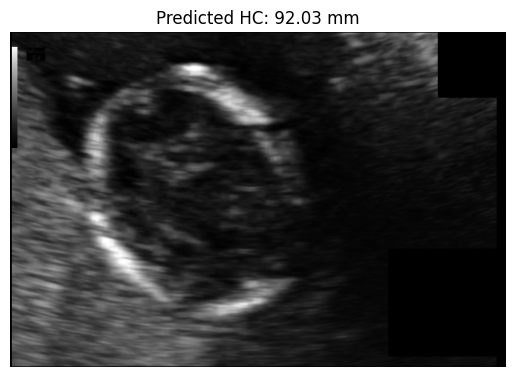

In [44]:
import random
import matplotlib.pyplot as plt

sample = random.choice(predictions)
img = cv2.imread(os.path.join(TEST_IMG_DIR, sample['filename']), cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title(f"Predicted HC: {sample['predicted_hc_mm']:.2f} mm")
plt.axis("off")
plt.show()